# Table of Contents

- [Imports and Common Settings](#Imports-and-Common-Settings)
- [Combining Hop and Zappa](#Combining-Hop-and-Zappa)
    - [Mixture Hop and Zappa without Preconditioning](#Mixture-Hop-and-Zappa-without-Preconditioning)
    - [Mixture Hop and Zappa with Preconditioning](#Mixture-Hop-and-Zappa-with-Preconditioning)
    - [Cycle Hop and Zappa without Preconditioning](#Cycle-Hop-and-Zappa-without-Preconditioning)
    - [Cycle Hop Zappa with Preconditioning](#Cycle-Hop-Zappa-with-Preconditioning)
- [Hug and Hop](#Hug-and-Hop)
    - [Hug & Hop without Preconditioning](#Hug-&-Hop-without-Preconditioning)
    - [Hug & Hop with Preconditioning](#Hug-&-Hop-with-Preconditioning)

# Imports and Common Settings

In [15]:
import numpy as np
from zappa_hop import HopZappaMixture, HopZappaMixturePC, HopZappaAlternating, HopZappaAlternatingPC
from numpy.linalg import inv
from scipy.stats import multivariate_normal
from utils import quick_MVN_scatter, quick_MVN_marginals
from HugHop.StandardHugHop import HugHop
from HugHop.HessianHugHop import HugHopPC
import matplotlib.pyplot as plt

In [2]:
# Target Distribution
mu = np.zeros(2)
Sigma = np.array([[1.0, 0.99], [0.99, 2.0]])
target = multivariate_normal(mu, Sigma)

# Settings
x0 = target.rvs()
l = 2.0     
k = 1.0
alpha = 0.2
grad_log_pi = lambda xy: - inv(Sigma) @ xy
burnin = 50000
N = 50000
m = 50
s = 0.5
tol = 1.48e-08
a_guess = 1.0
ap_star = 0.6

# For Hug and Hop
scale_q = 0.5
q = multivariate_normal(np.zeros(2), (scale_q**2)*np.eye(2))
T = 0.1 
B = 5 

# Combining Hop and Zappa

I combine Hop and Zappa in the following ways:

- A mixture of the Hop and Zappa kernel
- A mixture of the Hop and Zappa kernel using Preconditioning for the Hop kernel.
- A cycle of Hop and Zappa kernel
- A cycle of Hop and Zappa kernel using Preconditioning

### Mixture Hop and Zappa without Preconditioning

In [6]:
HZMsamples = HopZappaMixture(x0, alpha, grad_log_pi, l, k, 100000, m, Sigma, mu, s, tol, a_guess, ap_star)

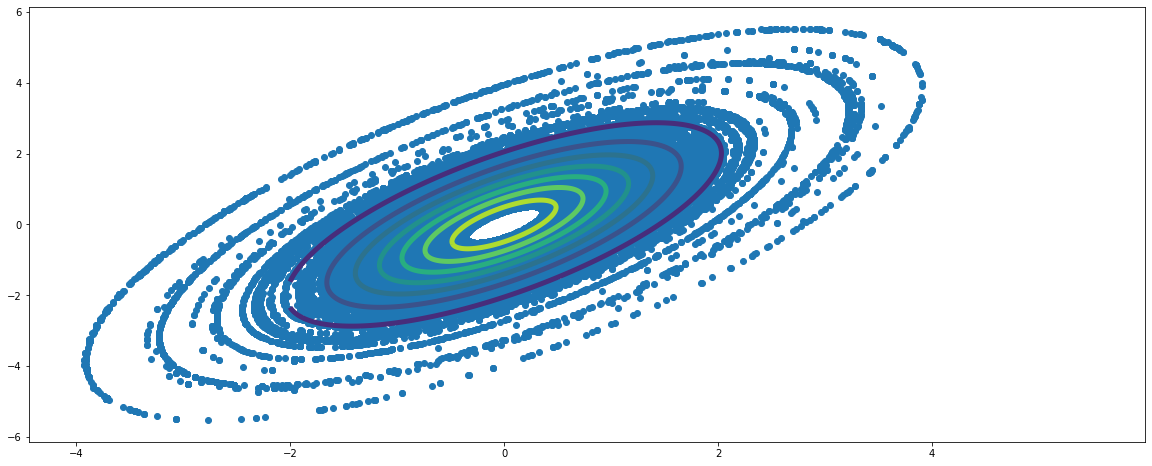

In [7]:
quick_MVN_scatter(HZMsamples, target)

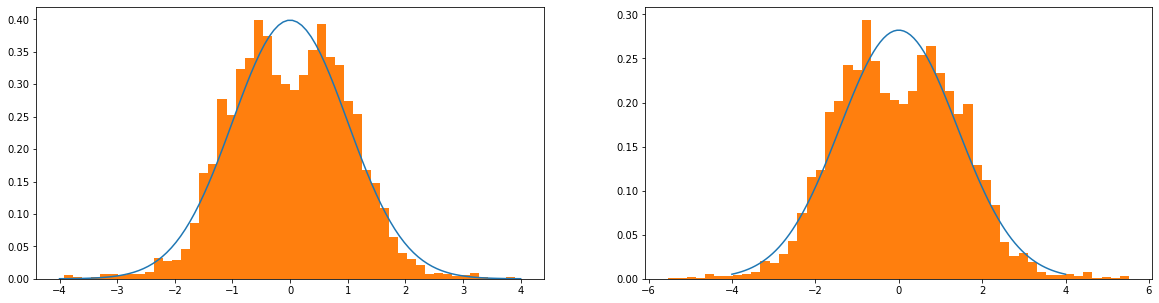

In [8]:
quick_MVN_marginals(HZMsamples, target)

### Mixture Hop and Zappa with Preconditioning

In [9]:
HZMsamplesPC = HopZappaMixturePC(x0, alpha, grad_log_pi, l, k, N, m, Sigma, mu,
                               s, burnin, tol, a_guess, ap_star)

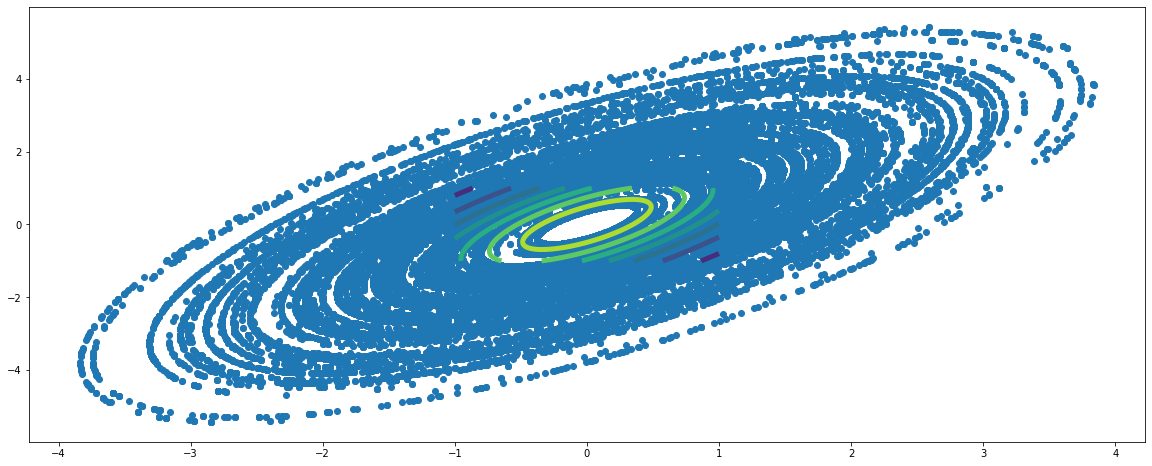

In [13]:
quick_MVN_scatter(HZMsamplesPC, target)

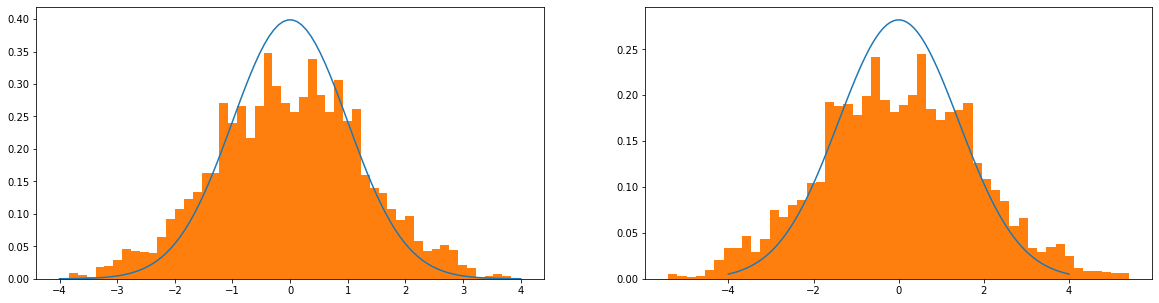

In [11]:
quick_MVN_marginals(HZMsamplesPC, target)

### Cycle Hop and Zappa without Preconditioning

In [9]:
HZCsamples = HopZappaAlternating(x0, grad_log_pi, l, k, N, m, Sigma, mu, s, tol, a_guess, ap_star)

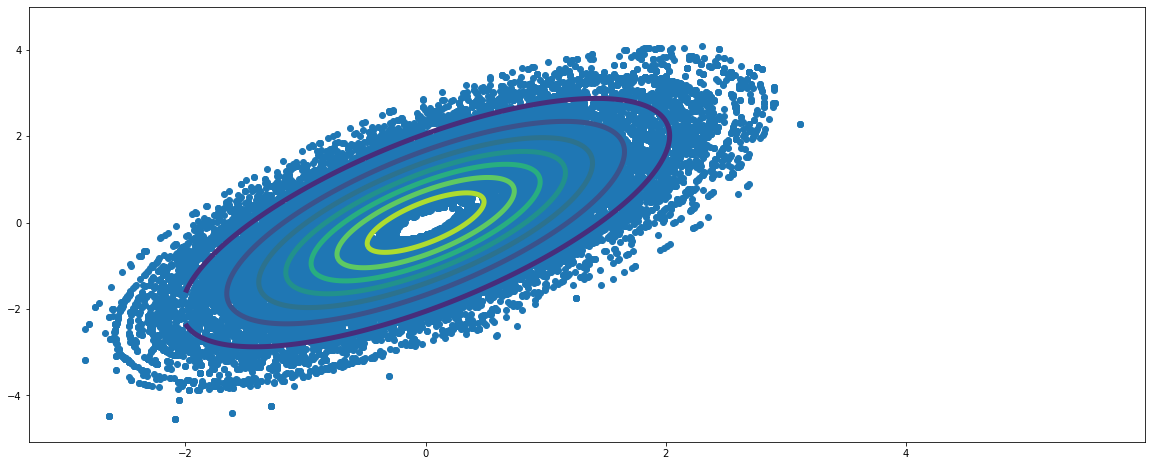

In [10]:
quick_MVN_scatter(HZCsamples, target)

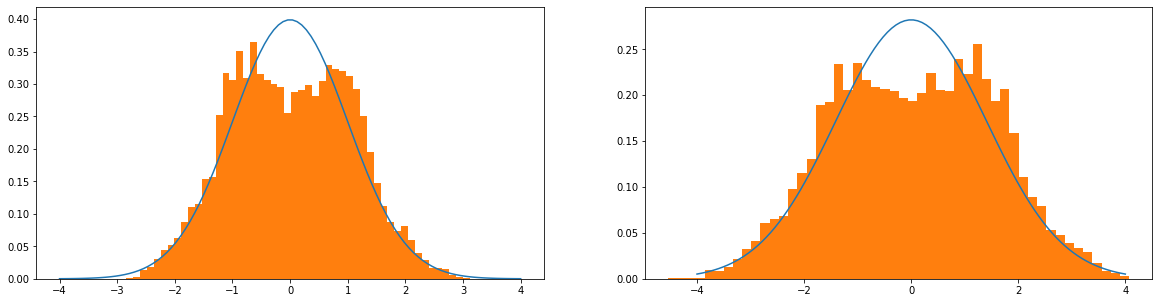

In [11]:
quick_MVN_marginals(HZCsamples, target)

### Cycle Hop Zappa with Preconditioning

In [12]:
HZCsamplesPC = HopZappaAlternatingPC(x0, grad_log_pi, l, k, N, 1, Sigma, 
                                       mu, s, burnin, tol, a_guess, ap_star)

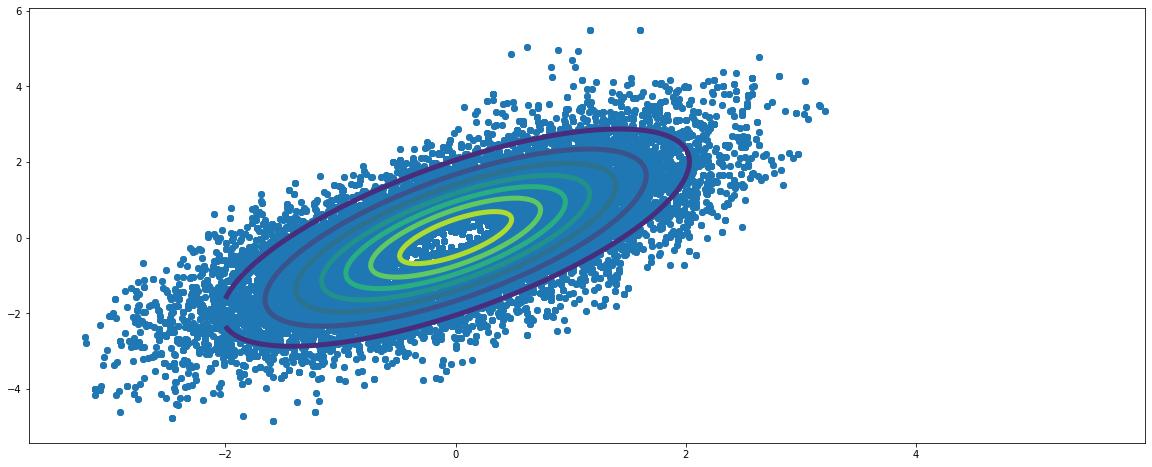

In [13]:
quick_MVN_scatter(HZCsamplesPC, target)

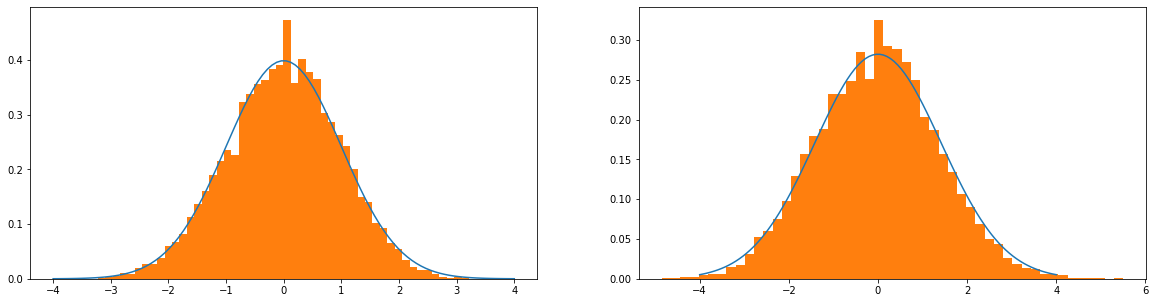

In [14]:
quick_MVN_marginals(HZCsamplesPC, target)

# Hug and Hop

### Hug & Hop without Preconditioning

In [15]:
HHsamples, _, _ = HugHop(T, B, x0, q, target.logpdf, grad_log_pi, l, k).sample(N)

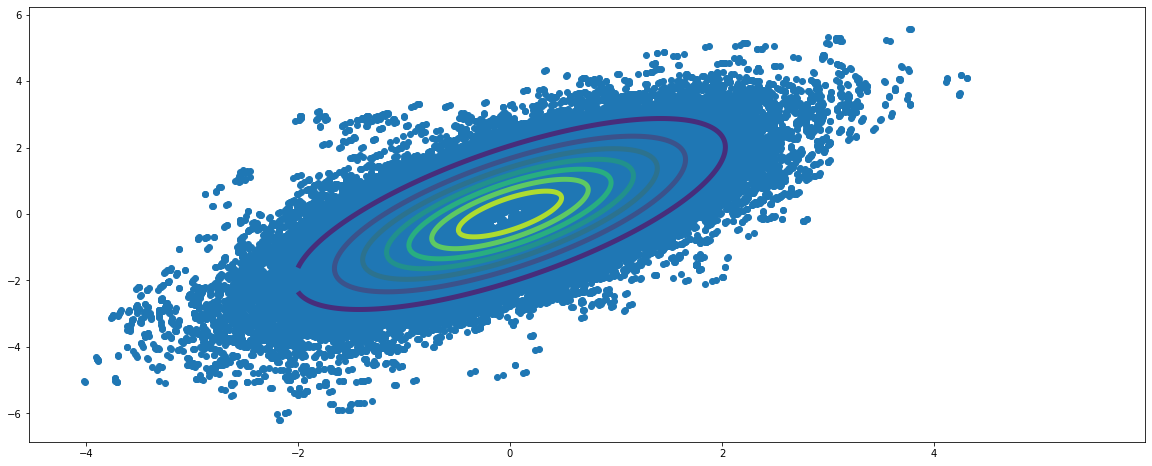

In [16]:
quick_MVN_scatter(HHsamples, target)

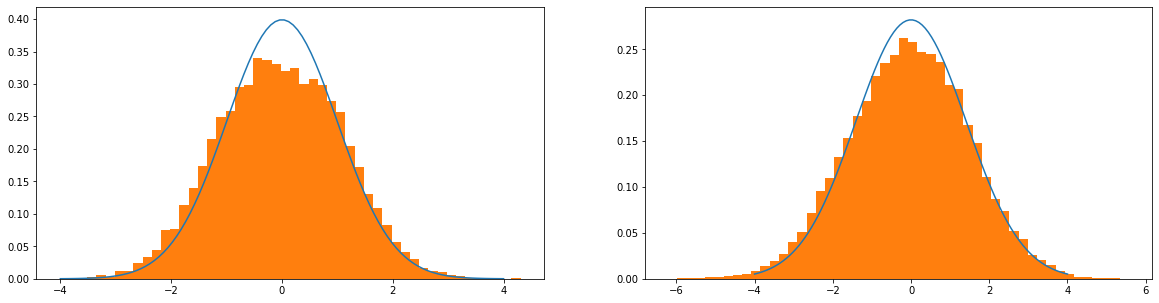

In [17]:
quick_MVN_marginals(HHsamples, target)

### Hug & Hop with Preconditioning

In [18]:
HHsamplesPC, _, _ = HugHopPC(T, B, x0, q, target.logpdf, grad_log_pi, l, k, burnin).sample(N)

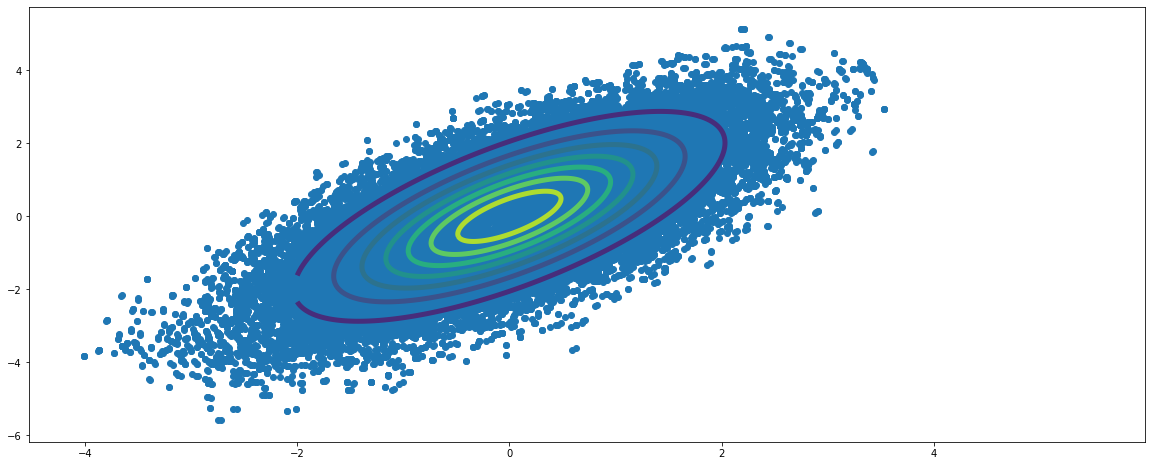

In [19]:
quick_MVN_scatter(HHsamplesPC, target)

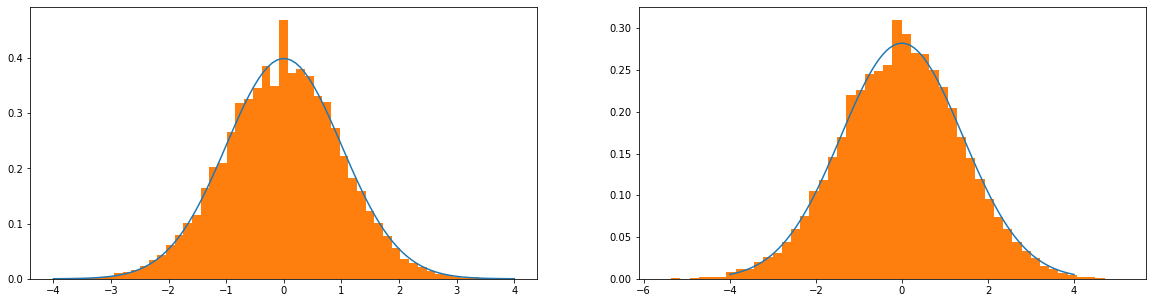

In [20]:
quick_MVN_marginals(HHsamplesPC, target)

In [3]:
from zappa_hop import ZappaHop

In [6]:
Alt = ZappaHop(target, alternating=True, preconditioning=False, adaptive=False)
alt_samples = Alt.sample(x0, grad_log_pi, 5000, 1, s, l, k)

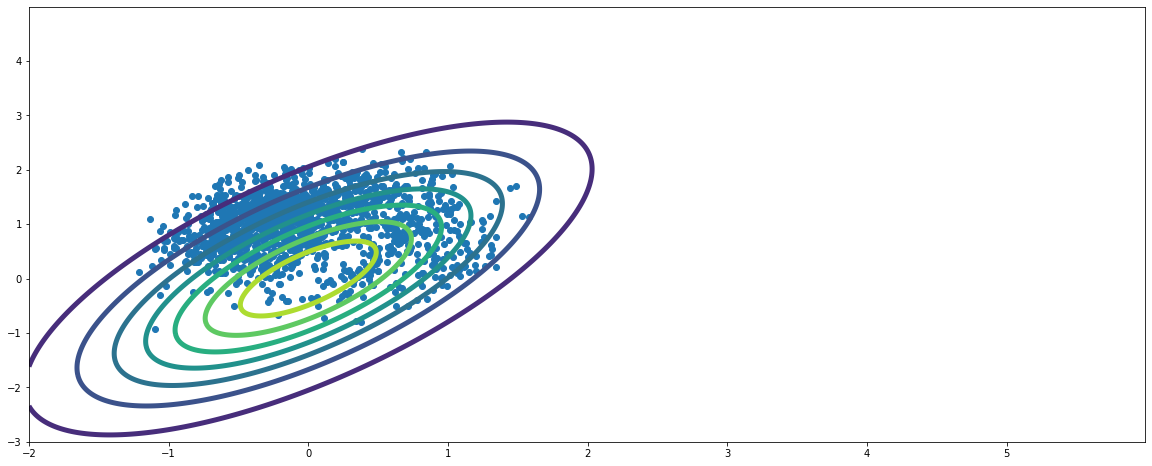

In [7]:
quick_MVN_scatter(alt_samples, target)